<a href="https://colab.research.google.com/github/Aryan-401/GoogleColabProjects/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch

In [ ]:
# f = w * x
# f = 2 * x

X = np.array([1,2,3,4], dtype=np.float32)
Y = np.array([2,4,6,8], dtype=np.float32)

w = 0


In [ ]:
#model prediction
def forward(x):
  return w*x

In [ ]:
#loss = MeanSquaredError

def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

In [ ]:
#gradient 
# MSE = 1/N (w*x - y)** 2 
# dJ/dW = 1/N 2x(wx - y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

In [ ]:
w = 0
print(f"Prediction before Training: f(5) = {forward(5):.3f}")
learning_rate = 0.01
n_iters = 20
for epoc in range(n_iters):
  y_pred = forward(X)  # predictions
  l = loss(Y, y_pred)  # loss
  dw = gradient(X, Y, y_pred)  # gradient
  w -= learning_rate * dw

  if epoc%2 == 1:
    print(f'epoc #{epoc+1}: w = {w:.8f}, l = {l:.8f}')
  
print(f"Prediction After Training: f(5) = {forward(5):.3f}")



Prediction before Training: f(5) = 0.000
epoc #2: w = 1.67999996, l = 4.79999924
epoc #4: w = 1.94879999, l = 0.12288000
epoc #6: w = 1.99180803, l = 0.00314574
epoc #8: w = 1.99868928, l = 0.00008053
epoc #10: w = 1.99979025, l = 0.00000206
epoc #12: w = 1.99996641, l = 0.00000005
epoc #14: w = 1.99999461, l = 0.00000000
epoc #16: w = 1.99999914, l = 0.00000000
epoc #18: w = 1.99999984, l = 0.00000000
epoc #20: w = 2.00000000, l = 0.00000000
Prediction After Training: f(5) = 10.000


In [ ]:
# f = w * x
# f = 2 * x

X = torch.tensor([1,2,3,4], dtype=torch.float32)
Y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

In [ ]:
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
print(f"Prediction before Training: f(5) = {forward(5):.3f}")
learning_rate = 0.01
n_iters = 100
for epoc in range(n_iters):
  y_pred = forward(X)  # predictions
  l = loss(Y, y_pred)  # loss
  l.backward()# gradient = backward pass
  with torch.no_grad():  # update weights
    w -= learning_rate * w.grad

  w.grad.zero_()  # zero gradient

  if epoc%10 == 0:
    print(f'epoc #{epoc+1}: w = {w:.8f}, l = {l:.8f}')
  
print(f"Prediction After Training: f(5) = {forward(5):.3f}")



Prediction before Training: f(5) = 0.000
epoc #1: w = 0.29999998, l = 30.00000000
epoc #11: w = 1.66531360, l = 1.16278565
epoc #21: w = 1.93410885, l = 0.04506890
epoc #31: w = 1.98702765, l = 0.00174685
epoc #41: w = 1.99744618, l = 0.00006770
epoc #51: w = 1.99949718, l = 0.00000262
epoc #61: w = 1.99990106, l = 0.00000010
epoc #71: w = 1.99998045, l = 0.00000000
epoc #81: w = 1.99999630, l = 0.00000000
epoc #91: w = 1.99999928, l = 0.00000000
Prediction After Training: f(5) = 10.000


In [ ]:
 '''
 Pipeline:
 Design Model (input, output size, forward pass)
 Construct Loss and optimiser
 Training Loop
  - Forward Pass: Compute Prediction
  - Backward Pass: Gradient
  - Update Weight(s)
'''
import torch.nn as nn

In [ ]:
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
print(f"Prediction before Training: f(5) = {forward(5):.3f}")
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimiser = torch.optim.SGD([w],lr=  learning_rate)
for epoc in range(n_iters):
  y_pred = forward(X)  # predictions
  l = loss(Y, y_pred)  # loss
  l.backward()# gradient = backward pass
  optimiser.step() # update weights

  optimiser.zero_grad()  # zero gradient

  if epoc%10 == 0:
    print(f'epoc #{epoc+1}: w = {w:.8f}, l = {l:.8f}')
  
print(f"Prediction After Training: f(5) = {forward(5):.3f}")



Prediction before Training: f(5) = 0.000
epoc #1: w = 0.29999998, l = 30.00000000
epoc #11: w = 1.66531360, l = 1.16278565
epoc #21: w = 1.93410885, l = 0.04506890
epoc #31: w = 1.98702765, l = 0.00174685
epoc #41: w = 1.99744618, l = 0.00006770
epoc #51: w = 1.99949718, l = 0.00000262
epoc #61: w = 1.99990106, l = 0.00000010
epoc #71: w = 1.99998045, l = 0.00000000
epoc #81: w = 1.99999630, l = 0.00000000
epoc #91: w = 1.99999928, l = 0.00000000
Prediction After Training: f(5) = 10.000


In [ ]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)
print(X_test)


model = nn.Linear(in_features=n_features, out_features=n_features)
'''
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_dim=n_features, output_dim=n_features)
'''
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')
learning_rate = 0.01
n_iters = 300
loss = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(),lr=  learning_rate)
for epoc in range(n_iters):
  y_pred = model(X)  # predictions
  l = loss(Y, y_pred)  # loss
  l.backward()# gradient = backward pass
  optimiser.step() # update weights

  optimiser.zero_grad()  # zero gradient

  if epoc%30 == 0:
    [w,b] = model.parameters()
    print(f'epoc #{epoc+1}: w = {w[0][0].item():.8f}, l = {l:.8f}, b= {b.item()}')


print(f"Prediction After Training: f(5) = {model(X_test).item():.3f}")



4 1
tensor([5.])
Prediction before training: f(5) = 3.213
epoc #1: w = 0.82941687, l = 13.61340618, b= 0.14345449209213257
epoc #31: w = 1.84491086, l = 0.03330931, b= 0.44225558638572693
epoc #61: w = 1.86205924, l = 0.02762859, b= 0.40550538897514343
epoc #91: w = 1.87394142, l = 0.02307955, b= 0.3706272840499878
epoc #121: w = 1.88478577, l = 0.01927954, b= 0.3387441039085388
epoc #151: w = 1.89469695, l = 0.01610517, b= 0.309603750705719
epoc #181: w = 1.90375566, l = 0.01345347, b= 0.2829701602458954
epoc #211: w = 1.91203511, l = 0.01123837, b= 0.25862768292427063
epoc #241: w = 1.91960216, l = 0.00938796, b= 0.23637929558753967
epoc #271: w = 1.92651844, l = 0.00784225, b= 0.21604491770267487
Prediction After Training: f(5) = 9.861


epoc #0: w = 1.17314649, l = 5748.09619141, b= 0.9882896542549133
epoc #100: w = 65.80497742, l = 557.58666992, b= 5.3132123947143555
epoc #200: w = 79.02423096, l = 342.34024048, b= 4.564918041229248
epoc #300: w = 81.76152039, l = 332.99948120, b= 4.193416118621826
epoc #400: w = 82.33278656, l = 332.58679199, b= 4.087517261505127
epoc #500: w = 82.45258331, l = 332.56845093, b= 4.061623573303223
epoc #600: w = 82.47776794, l = 332.56762695, b= 4.055699825286865
epoc #700: w = 82.48307037, l = 332.56753540, b= 4.054390907287598
epoc #800: w = 82.48421478, l = 332.56756592, b= 4.054107189178467
epoc #900: w = 82.48426056, l = 332.56756592, b= 4.0540547370910645
Prediction After Training: f(5) = 416.475


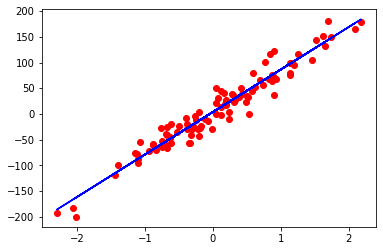

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
learning_rate = 0.01

y = y.view(y.shape[0],1)
n_samples, n_features = X.shape
# model
model = nn.Linear(in_features=n_features, out_features=n_features)
# loss
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)
# training loop
num_epoc = 1000
for epoc in range(num_epoc):
  #forward and loss
  y_pred = model(X)
  loss = criterion(y_pred, y)
  #backward pass
  loss.backward()
  #update
  optimiser.step()

  optimiser.zero_grad()

  if epoc%100 == 0:
    [w,b] = model.parameters()
    print(f'epoc #{epoc}: w = {w[0][0].item():.8f}, l = {loss.item():.8f}, b= {b.item()}')


print(f"Prediction After Training: f(5) = {model(X_test).item():.3f}")

predicted = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()
